In [42]:
import pandas as pd

In [43]:
import seaborn as sns

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
from sklearn.neural_network import MLPClassifier

In [45]:
# Definujte cestu k CSV súboru s datasetom Iris
songs_dataset = "zadanie1_dataset_number_only.csv"

# Načítajte dataset s použitím Pandas
df = pd.read_csv(songs_dataset)

In [46]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists'],
      dtype='object')

In [48]:
df.dtypes

danceability         float64
energy               float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
popularity           float64
number_of_artists    float64
dtype: object

In [49]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,number_of_artists
count,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,1.196000e+04,11843.000000,11839.000000
mean,0.479550,0.529783,-12.372094,0.104329,0.483605,0.264986,0.224383,0.461312,117.749858,1.094073e+06,25.131892,1.714756
std,0.273845,0.333071,8.265012,0.191664,0.404506,0.377885,0.212392,0.276219,32.029332,3.321775e+07,21.072017,1.276377
min,0.000000,0.000197,-47.046000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,-4.273460e+05,0.000000,1.000000
25%,0.338000,0.186000,-17.865000,0.037300,0.036500,0.000003,0.095800,0.221000,92.775250,1.692098e+05,3.000000,1.000000
50%,0.485000,0.595000,-9.537000,0.045900,0.468000,0.002670,0.130000,0.461000,116.153500,2.134530e+05,24.000000,1.000000
75%,0.608000,0.841000,-5.834000,0.070100,0.923000,0.678250,0.280000,0.688250,137.525250,2.739330e+05,42.000000,2.000000
max,8.375000,1.000000,1.519000,0.965000,0.996000,0.994000,0.997000,0.995000,241.423000,1.930821e+09,82.000000,19.000000


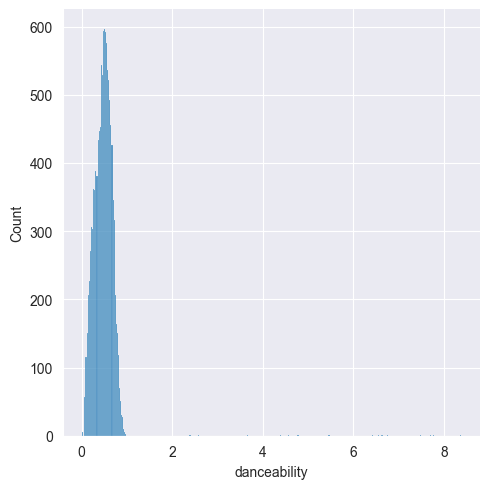

In [50]:
sns.displot(df['danceability'])

<Axes: ylabel='danceability'>

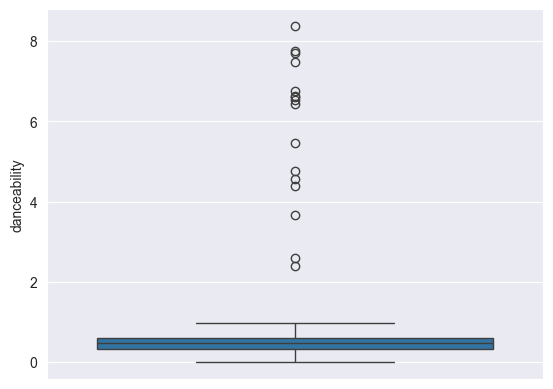

In [51]:
sns.boxplot(df['danceability'])

In [52]:
# Funkcia na odstránenie outlierov pomocou IQR pre všetky stĺpce
def remove_outliers_iqr(dataframe):
    # Vytvorenie prazdnej DataFrame pre výsledky
    df_cleaned = pd.DataFrame()
    
    # Iterovanie cez všetky stĺpce v datasete
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[column] = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)][column]
    
    return df_cleaned

In [54]:
# Zavolanie funkcie na odstránenie outlierov pre všetky stĺpce
df_cleaned = remove_outliers_iqr(df)

print('before removing outliers:', len(df))
print('after removing outliers:',len(df_cleaned))
print('outliers:', len(df)-len(df_cleaned))

print("Dataset bez outlierov:")
print(df_cleaned)

before removing outliers: 11960
after removing outliers: 11944
outliers: 16
Dataset bez outlierov:
       danceability  energy  loudness  speechiness  acousticness  \
0             0.638   0.781    -6.848       0.0285        0.0118   
1             0.744   0.816    -3.933       0.0372        0.1440   
2             0.721   0.768    -4.371       0.0685        0.2100   
3             0.700   0.782    -4.631       0.0542        0.4490   
4             0.764   0.587    -7.002       0.0298        0.0721   
...             ...     ...       ...          ...           ...   
11955         0.442   0.379   -12.711       0.0264        0.9610   
11956         0.485   0.226   -10.503       0.0278        0.9820   
11957         0.741   0.338    -8.488       0.0432        0.9300   
11958         0.493   0.773    -5.875       0.0452        0.4560   
11959         0.702   0.792    -8.631       0.0325        0.3400   

       instrumentalness  liveness  valence    tempo  duration_ms  popularity  \
0   

In [120]:
df_cleaned.isnull().sum()

danceability            0
energy                  0
loudness               94
speechiness          1556
acousticness            0
instrumentalness        0
liveness             1130
valence                 0
tempo                  41
duration_ms           736
popularity            116
number_of_artists    1107
dtype: int64

In [121]:
# Iterujte cez všetky stĺpce a získajte počet hodnôt pre každý stĺpec
pocet_hodnot_pre_stlpce = {}
for column in df.columns:
    pocet_hodnot = df[column].count()
    pocet_hodnot_pre_stlpce[column] = pocet_hodnot

# Výsledky počtu hodnôt pre všetky stĺpce
print("Počet hodnôt pre jednotlivé stĺpce:")
for column, pocet_hodnot in pocet_hodnot_pre_stlpce.items():
    print(f"Stĺpec '{column}' obsahuje {pocet_hodnot} hodnôt.")

Počet hodnôt pre jednotlivé stĺpce:
Stĺpec 'danceability' obsahuje 11960 hodnôt.
Stĺpec 'energy' obsahuje 11960 hodnôt.
Stĺpec 'loudness' obsahuje 11960 hodnôt.
Stĺpec 'speechiness' obsahuje 11960 hodnôt.
Stĺpec 'acousticness' obsahuje 11960 hodnôt.
Stĺpec 'instrumentalness' obsahuje 11960 hodnôt.
Stĺpec 'liveness' obsahuje 11960 hodnôt.
Stĺpec 'valence' obsahuje 11960 hodnôt.
Stĺpec 'tempo' obsahuje 11960 hodnôt.
Stĺpec 'duration_ms' obsahuje 11960 hodnôt.
Stĺpec 'popularity' obsahuje 11843 hodnôt.
Stĺpec 'number_of_artists' obsahuje 11839 hodnôt.


In [122]:
# Identifikácia chýbajúcich hodnôt v datasete
print("pocet NULL hodnot: ",df.isnull().sum().sum())

pocet NULL hodnot:  238


In [123]:
df_without_nulls = df.dropna(how='any')

In [124]:
print("pocet NULL hodnot: ",df_without_nulls.isnull().sum().sum())

pocet NULL hodnot:  0


In [125]:
# Rozdelenie dát do trénovacej (X_train, y_train), validačnej (X_val, y_val) a testovacej (X_test, y_test) množiny.
# 'X' sú vstupné stĺpce a 'Y' je výstupný stĺpec.
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['popularity']

# Rozdelenie dát na trénovaciu, validačnú a testovaciu množinu (napr. 70-15-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [126]:
# Zobrazenie tvaru (počtu riadkov a stľpcov) trénovacej množiny
print("Tvar trénovacej množiny X_train:", X_train.shape)
print("Tvar trénovacej množiny y_train:", y_train.shape)

# Zobrazenie tvaru validačnej množiny
print("Tvar validačnej množiny X_val:", X_val.shape)
print("Tvar validačnej množiny y_val:", y_val.shape)

# Zobrazenie tvaru testovacej množiny
print("Tvar testovacej množiny X_test:", X_test.shape)
print("Tvar testovacej množiny y_test:", y_test.shape)

Tvar trénovacej množiny X_train: (8372, 10)
Tvar trénovacej množiny y_train: (8372,)
Tvar validačnej množiny X_val: (1794, 10)
Tvar validačnej množiny y_val: (1794,)
Tvar testovacej množiny X_test: (1794, 10)
Tvar testovacej množiny y_test: (1794,)


In [127]:
# Vytvorenie a nastavenie scaleru na trénovacie dáta
scaler = MinMaxScaler()
scaler.fit(X_train)

# Normalizácia trénovacích dát
X_train_normalized = scaler.transform(X_train)

# Použitie toho istého scaleru na validačné dáta a testovacie dáta
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [128]:
print(X_val_normalized)
print(X_test_normalized)

[[5.77910448e-02 9.59992118e-01 8.64627637e-01 ... 3.16582915e-01
  5.51194377e-01 2.97747372e-04]
 [2.66268657e-02 2.46348531e-03 2.02318405e-01 ... 7.24623116e-02
  2.67281908e-01 2.97471375e-04]
 [6.55522388e-02 7.91959016e-01 8.52535235e-01 ... 4.81407035e-01
  5.01824598e-01 2.70710546e-04]
 ...
 [4.78805970e-02 3.62101334e-02 5.89171045e-01 ... 4.71356784e-01
  5.51206803e-01 2.90332220e-04]
 [5.87462687e-02 9.83996847e-01 9.14331582e-01 ... 3.32663317e-01
  6.00655281e-01 3.29041698e-04]
 [3.02089552e-02 5.70142318e-02 5.00396130e-01 ... 1.17587940e-01
  3.43919179e-01 2.80424810e-04]]
[[3.59402985e-02 8.12963154e-01 7.97681595e-01 ... 2.36180905e-01
  4.52525236e-01 4.12406240e-04]
 [5.40895522e-02 8.38968277e-01 8.65148862e-01 ... 7.90954774e-01
  6.83277898e-01 3.06212142e-04]
 [5.30149254e-02 9.21984631e-01 8.86644150e-01 ... 3.02512563e-01
  5.80748313e-01 3.02925551e-04]
 ...
 [5.85074627e-02 8.63973203e-01 8.42194146e-01 ... 3.86934673e-01
  5.04798631e-01 3.21510036e-04]

In [129]:
y = y_train.isnull().sum()
print(y)

84


In [130]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))


In [131]:
import numpy as np

# Kontrola chýbajúcich hodnôt v NumPy poli
missing_values = np.isnan(y_train_imputed).sum()
print("Počet chýbajúcich hodnôt:", missing_values)

Počet chýbajúcich hodnôt: 0


In [132]:
# Vytvorenie a nastavenie jednoduchej neurónovej siete pre klasifikáciu
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Trénovanie modelu na trénovacích dátach
model.fit(X_train_normalized, y_train)

# Predikcia na validačných dátach
y_val_pred = model.predict(X_val_normalized)

ValueError: Input y contains NaN.